In [39]:
import pandas as pd
import traitlets.utils.bunch
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from plotting import plot_learning_curve


In [39]:

def process_abalone_ternary():
    df = pd.read_csv('data/abalone.data', names=["Sex", "Length", "Diameter", "Height",
                                                 "Whole weight", "Shucked weight", "Viscera weight",
                                                 "Shell weight", "Rings"])
    df = df[(df["Height"] != 1.13) & (df['Height'] != 0.515)]

    # deal with categorical data
    df.loc[df.Sex == 'M', 'Male'] = 1.
    df.loc[df.Sex == 'F', 'Female'] = 1.
    df.loc[df.Sex == 'I', 'Infant'] = 1.
    df.fillna(0, inplace=True)

    # bucketize rings
    df.loc[df.Rings < 11, 'Rings'] = 1.
    df.loc[(df.Rings < 21) & (df.Rings > 10), 'Rings'] = 2.
    df.loc[df.Rings > 20, 'Rings'] = 3.

    return traitlets.Bunch(
        data=df[['Male', 'Female', 'Infant', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
                 'Viscera weight', 'Shell weight']].values,
        target=df[['Rings']].values,
        target_names=df["Rings"].unique(),
        DESCR='abalone dataset...',
        feature_names=['Male', 'Female', 'Infant', "Length", "Diameter", "Height",
                       "Whole weight", "Shucked weight", "Viscera weight",
                       "Shell weight"],
    )

abalone_ternary = process_abalone_ternary()
ds_name = 'Abalone Ternary'


features_train, features_test, labels_train, labels_test = train_test_split(abalone_ternary.data,
                                                                            abalone_ternary.target, test_size=0.3,
                                                                            random_state=123)

In [19]:
from mlrose import NNGSRunner

In [28]:
rhc_grid_search_params = {
    'restarts': [0],
    'max_iters': [100],
    'learning_rate_init': [0.1],
    'hidden_layer_sizes': [[1, 1]],
    'activation': [mlrose.neural.activation.relu],
}
rhc_experiment_parameters = {
    'x_train': features_train,
    'y_train': labels_train_hot,
    'x_test': features_test,
    'y_test': labels_test_hot,
    'max_attempts': 10,
    'early_stopping': True
}


def run_nn_experiment(runner, output_directory, experiment_name, experiment_parameters, seed, grid_search_parameters, **kwargs):
    all_args = {**experiment_parameters,**kwargs,}
    results = runner(seed=seed, 
            experiment_name=experiment_name, 
            grid_search_parameters=grid_search_parameters,
            output_directory=output_directory,
                 **all_args).run()  
    
    print(results)

    return results


run_nn_experiment(runner=NNGSRunner,
                  algorithm=mlrose.algorithms.rhc.random_hill_climb,
                  output_directory='out/TESTjupyter',
                  experiment_name='testesp',
                  experiment_parameters=rhc_experiment_parameters,
                  grid_search_parameters=rhc_grid_search_params,
                  iteration_list=[2048, 4096, 8192, 16384],
                  seed=123)




Running nngs_rhc
Fitting 5 folds for each of 1 candidates, totalling 5 fits
*****************
*** Run START ***
*****************
max_iters:[100], restarts:[0], init_state:[[ 0.39293837 -0.42772133 -0.54629709  0.10262954  0.43893794 -0.15378708
  0.9615284   0.36965948 -0.0381362  -0.21576496 -0.31364397  0.45809941
 -0.12285551 -0.88064421 -0.20391149]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[1, 1]], learning_rate_init:[0.1], max_attempts:[10], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[testesp], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[1.1485]
	[ 0.39293837 -0.42772133 -0.54629709  0.10262954  0.43893794 -0.15378708//  0.9615284   0.36965948 -0.0381362  -0.21576496 -0.31364397  0.45809941// -0.12285551 -0.88064421 -0.20391149]...



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iters:[100], restarts:[0], init_state:[[ 0.39293837 -0.42772133 -0.54629709  0.10262954  0.43893794 -0.15378708
  0.9615284   0.36965948 -0.0381362  -0.21576496 -0.31364397  0.45809941
 -0.12285551 -0.88064421 -0.20391149]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[1, 1]], learning_rate_init:[0.1], max_attempts:[10], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[testesp], attempt:[11], iteration:[88], done:[True], time:[0.30], fitness:[1.0986]
	[ 0.19293837 -0.72772133 -0.74629709 -0.09737046  0.13893794 -0.15378708//  0.8615284   0.26965948 -0.1381362  -0.71576496 -0.41364397 -0.04190059// -0.02285551 -0.88064421 -0.60391149]...

Saving: [out/TESTjupyter/testesp/nngs_rhc__testesp__run_stats_df__554BCA6D5A9A42AFA815EFBA804EED49.p]
Saving: [out/TESTjupyter/testesp/nngs_rhc__testesp__run_stats_df__554BCA6D5A9A42AFA815EFBA804EED49.csv]
Saving: [out/TESTjupyter/testesp/nngs_rhc__testesp__curves

ValueError: multilabel-indicator is not supported

In [25]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
 
# https://mlrose.readthedocs.io/en/stable/source/tutorial3.html
one_hot = OneHotEncoder()

labels_train_hot = one_hot.fit_transform(labels_train.reshape(-1, 1)).todense()
labels_test_hot = one_hot.transform(labels_test.reshape(-1, 1)).todense()

In [46]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, \
                                                    test_size = 0.2, random_state = 3)

# # Normalize feature data
# scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # One hot encode target values
# one_hot = OneHotEncoder()

# y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
# y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

In [42]:
abalone_ternary.data

array([[1.    , 0.    , 0.    , ..., 0.2245, 0.101 , 0.15  ],
       [1.    , 0.    , 0.    , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 1.    , 0.    , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [1.    , 0.    , 0.    , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 1.    , 0.    , ..., 0.531 , 0.261 , 0.296 ],
       [1.    , 0.    , 0.    , ..., 0.9455, 0.3765, 0.495 ]])

In [34]:
labels_train

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [2.],
       [2.]])

In [51]:
y_train

array([0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0,
       2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0,
       1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2,
       0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1,
       1, 0, 1, 2, 2, 2, 0, 0, 2, 2])

In [52]:
y_test

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1])

In [56]:
data.target[:88]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
data.data[:88]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [104]:
pd.read_csv('out/TESTjupyters/testesp/nngs_gd__testesp__cv_results_df.csv')

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate_init,param_max_iters,param_restarts,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,0.077148,0.004316,0.001685,0.000184,relu,"[1, 1]",0.1,1000,0,...,0.64491,0.012926,1,0.63997,0.647829,0.645584,0.648578,0.64259,0.64491,0.003232


In [151]:
pd.read_csv('out/newss/testgdss/nngs_ga__testgdss__cv_results_df.csv')

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate_init,param_max_iters,param_temperature,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,44.938453,1.098109,0.001338,0.000307,relu,"[1, 1, 1]",0.01,100,1,...,0.64491,0.012926,1,0.63997,0.647829,0.645584,0.648578,0.64259,0.64491,0.003232
1,1,236.618305,19.539702,0.001299,0.000207,relu,"[1, 1, 1]",0.01,500,1,...,0.64491,0.012926,1,0.63997,0.647829,0.645584,0.648578,0.64259,0.64491,0.003232
2,2,410.808210,1.794451,0.001211,0.000026,relu,"[1, 1, 1]",0.01,1000,1,...,0.64491,0.012926,1,0.63997,0.647829,0.645584,0.648578,0.64259,0.64491,0.003232
3,3,43.203220,1.616083,0.001153,0.000028,relu,"[2, 2, 2]",0.01,100,1,...,0.64491,0.012926,1,0.63997,0.647829,0.645584,0.648578,0.64259,0.64491,0.003232
4,4,207.378474,1.926149,0.001213,0.000021,relu,"[2, 2, 2]",0.01,500,1,...,0.64491,0.012926,1,0.63997,0.647829,0.645584,0.648578,0.64259,0.64491,0.003232
5,5,412.001902,0.638592,0.001272,0.000048,relu,"[2, 2, 2]",0.01,1000,1,...,0.64491,0.012926,1,0.63997,0.647829,0.645584,0.648578,0.64259,0.64491,0.003232


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
Iris = load_iris()
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(abalone_ternary.data, abalone_ternary.target, \
                                                    test_size = 0.2, random_state = 31)

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()
# Initialize neural network object and fit object
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = 20000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 10000, \
                                 random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7904191616766467


In [130]:
from sklearn.metrics import accuracy_score

# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)


0.6517964071856287
0.6598802395209581


In [134]:
for i in np.arange(100, 1000, 100):
    print (i)

100
200
300
400
500
600
700
800
900


In [142]:
y_test_pred

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [157]:
pd.read_csv('out/sa/tuning/nngs_sa__tuning__run_stats_df__5CD4E7D8819FA62F2B20E949C7269555.csv')

,Unnamed: 0,Iteration,Fitness,Time,State,max_iters,temperature,init_state,algorithm,activation,bias,early_stopping,clip_max,hidden_layer_sizes,learning_rate_init,max_attempts
0,0,0,27.009895,0.065042,"[-0.5640231754284875, -0.8564369369171607, 0.6...",100,1,"[-0.5640231754284875, -0.8564369369171607, 0.6...",sa,relu,True,True,1.000000e+10,"[300, 300, 300, 300]",0.001,1000
1,1,256,27.010806,13.860455,"[-0.5640231754284875, -0.8564369369171607, 0.6...",100,1,"[-0.5640231754284875, -0.8564369369171607, 0.6...",sa,relu,True,True,1.000000e+10,"[300, 300, 300, 300]",0.001,1000
2,2,512,27.010806,13.860455,"[-0.5640231754284875, -0.8564369369171607, 0.6...",100,1,"[-0.5640231754284875, -0.8564369369171607, 0.6...",sa,relu,True,True,1.000000e+10,"[300, 300, 300, 300]",0.001,1000
3,3,1024,27.010806,13.860455,"[-0.5640231754284875, -0.8564369369171607, 0.6...",100,1,"[-0.5640231754284875, -0.8564369369171607, 0.6...",sa,relu,True,True,1.000000e+10,"[300, 300, 300, 300]",0.001,1000
4,4,2048,27.010806,13.860455,"[-0.5640231754284875, -0.8564369369171607, 0.6...",100,1,"[-0.5640231754284875, -0.8564369369171607, 0.6...",sa,relu,True,True,1.000000e+10,"[300, 300, 300, 300]",0.001,1000
5,5,4096,27.010806,13.860455,"[-0.5640231754284875, -0.8564369369171607, 0.6...",100,1,"[-0.5640231754284875, -0.8564369369171607, 0.6...",sa,relu,True,True,1.000000e+10,"[300, 300, 300, 300]",0.001,1000
6,6,8192,27.010806,13.860455,"[-0.5640231754284875, -0.8564369369171607, 0.6...",100,1,"[-0.5640231754284875, -0.8564369369171607, 0.6...",sa,relu,True,True,1.000000e+10,"[300, 300, 300, 300]",0.001,1000


In [162]:
pd.read_csv('out/sa/tuning/nngs_sa__tuning__cv_results_df.csv')

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate_init,param_max_iters,param_temperature,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,5.746462,0.167307,0.001619,0.000376,relu,"[5, 5, 5, 5]",0.001,1000,1,...,0.298204,0.220477,4,0.646707,0.327470,0.008234,0.123129,0.299401,0.280988,0.217055
1,1,5.806125,0.231238,0.001663,0.000271,relu,"[5, 5, 5, 5]",0.001,1000,5,...,0.350898,0.037748,2,0.319985,0.307635,0.405689,0.346931,0.401946,0.356437,0.040737
2,2,5.731359,0.178644,0.001489,0.000039,relu,"[5, 5, 5, 5]",0.001,1000,10,...,0.314970,0.070912,3,0.356287,0.409431,0.389222,0.197605,0.272829,0.325075,0.078972
3,3,5.542188,0.129054,0.001678,0.000502,relu,"[5, 5, 5, 5]",0.001,1000,20,...,0.506886,0.185355,1,0.639970,0.651572,0.441991,0.191991,0.598428,0.504790,0.173421


In [163]:
pd.read_csv('out/sa/tuning/nngs_sa__tuning__run_stats_df.csv')

,Unnamed: 0,Iteration,Fitness,Time,State,max_iters,temperature,init_state,algorithm,activation,bias,early_stopping,clip_max,hidden_layer_sizes,learning_rate_init,max_attempts
0,0,0,0.996958,0.003883,"[0.582027428001004, -0.7480828712261727, -0.32...",1000,20,"[0.582027428001004, -0.7480828712261727, -0.32...",sa,relu,True,True,1.000000e+10,"[5, 5, 5, 5]",0.001,1000
1,1,1000,0.998062,6.416772,"[0.583027428001004, -0.7510828712261727, -0.32...",1000,20,"[0.582027428001004, -0.7480828712261727, -0.32...",sa,relu,True,True,1.000000e+10,"[5, 5, 5, 5]",0.001,1000


In [171]:
import mlrose
import numpy as np
fitness = mlrose.FlipFlop()
state = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
fitness.evaluate(state)

49

In [175]:
pd.read_csv('out/sa/tuning/nngs_sa__tuning__cv_results_df.csv').columns

Index(['Unnamed: 0', 'mean_fit_time', 'std_fit_time', 'mean_score_time',
       'std_score_time', 'param_activation', 'param_hidden_layer_sizes',
       'param_learning_rate_init', 'param_max_iters', 'param_temperature',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [177]:
pd.read_csv('out/sa/tuning/nngs_sa__tuning__cv_results_df.csv')

,Unnamed: 0,Iteration,Time,Fitness,max_iters,temperature,init_state,algorithm,activation,bias,early_stopping,clip_max,hidden_layer_sizes,learning_rate_init,max_attempts
0,0,0,0.004541,1.007666,1000,1,"[-0.25359335510448244, -0.3100382457826272, 0....",sa,relu,True,True,1.000000e+10,"[5, 5, 5, 5]",0.001,1000
1,1,1,0.013797,1.007666,1000,1,"[-0.25359335510448244, -0.3100382457826272, 0....",sa,relu,True,True,1.000000e+10,"[5, 5, 5, 5]",0.001,1000
2,2,2,0.020040,1.007657,1000,1,"[-0.25359335510448244, -0.3100382457826272, 0....",sa,relu,True,True,1.000000e+10,"[5, 5, 5, 5]",0.001,1000
3,3,3,0.026344,1.007657,1000,1,"[-0.25359335510448244, -0.3100382457826272, 0....",sa,relu,True,True,1.000000e+10,"[5, 5, 5, 5]",0.001,1000
4,4,4,0.032358,1.007657,1000,1,"[-0.25359335510448244, -0.3100382457826272, 0....",sa,relu,True,True,1.000000e+10,"[5, 5, 5, 5]",0.001,1000
5,5,5,0.038501,1.007692,1000,1,"[-0.25359335510448244, -0.3100382457826272, 0....",sa,relu,True,True,1.000000e+10,"[5, 5, 5, 5]",0.001,1000
6,6,6,0.045089,1.007692,1000,1,"[-0.25359335510448244, -0.3100382457826272, 0....",sa,relu,True,True,1.000000e+10,"[5, 5, 5, 5]",0.001,1000
7,7,7,0.051408,1.007678,1000,1,"[-0.25359335510448244, -0.3100382457826272, 0....",sa,relu,True,True,1.000000e+10,"[5, 5, 5, 5]",0.001,1000
8,8,8,0.057585,1.007680,1000,1,"[-0.25359335510448244, -0.3100382457826272, 0....",sa,relu,True,True,1.000000e+10,"[5, 5, 5, 5]",0.001,1000
9,9,9,0.063436,1.007682,1000,1,"[-0.25359335510448244, -0.3100382457826272, 0....",sa,relu,True,True,1.000000e+10,"[5, 5, 5, 5]",0.001,1000


In [187]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.read_csv('out/sa/iters/nngs_sa__iters__cv_results_df.csv')

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate_init,param_max_iters,param_temperature,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,0.071365,0.015640,0.001751,0.000885,relu,[2],0.001,10,1,"{'activation': <function relu at 0x10c4e1cb0>,...",0.179641,0.426647,0.642216,0.663174,0.311377,0.444611,0.187137,4,0.176272,0.483159,0.645584,0.661302,0.341692,0.461602,0.184383
1,1,0.092925,0.008848,0.001321,0.000169,relu,[2],0.001,15,1,"{'activation': <function relu at 0x10c4e1cb0>,...",0.440120,0.559880,0.624251,0.613772,0.619760,0.571557,0.069706,1,0.403817,0.599177,0.605913,0.585704,0.607036,0.560329,0.078624
2,2,0.127856,0.015213,0.001227,0.000072,relu,[2],0.001,20,1,"{'activation': <function relu at 0x10c4e1cb0>,...",0.348802,0.419162,0.321856,0.354790,0.317365,0.352395,0.036431,5,0.334955,0.374251,0.351048,0.342814,0.352171,0.351048,0.013164
3,3,0.156417,0.004944,0.001305,0.000061,relu,[2],0.001,25,1,"{'activation': <function relu at 0x10c4e1cb0>,...",0.365269,0.308383,0.272455,0.281437,0.245509,0.294611,0.040639,6,0.340195,0.269461,0.278443,0.276198,0.285180,0.289895,0.025646
4,4,0.200657,0.015674,0.001429,0.000144,relu,[2],0.001,30,1,"{'activation': <function relu at 0x10c4e1cb0>,...",0.278443,0.386228,0.642216,0.630240,0.631737,0.513772,0.152069,2,0.276946,0.349551,0.645584,0.648578,0.627246,0.509581,0.162105
5,5,0.241485,0.018492,0.001559,0.000272,relu,[2],0.001,35,1,"{'activation': <function relu at 0x10c4e1cb0>,...",0.176647,0.633234,0.226048,0.585329,0.631737,0.450599,0.204837,3,0.171781,0.647829,0.235404,0.592066,0.627246,0.454865,0.206917
6,6,0.255069,0.005367,0.001229,0.000073,relu,[2],0.001,40,1,"{'activation': <function relu at 0x10c4e1cb0>,...",0.233533,0.339820,0.254491,0.184132,0.429641,0.288323,0.086747,7,0.223054,0.324850,0.269461,0.171781,0.397829,0.277395,0.078647


In [185]:
pd.read_csv('out/sa/iters/nngs_sa__iters__run_stats_df.csv')

,Unnamed: 0,Iteration,Fitness,Time,State,max_iters,temperature,init_state,algorithm,activation,bias,early_stopping,clip_max,hidden_layer_sizes,learning_rate_init,max_attempts
0,0,0,1.098612,0.002718,"[0.005915312314872523, -0.9787721710528132, 0....",1000,1,"[0.005915312314872523, -0.9787721710528132, 0....",sa,relu,True,True,1.000000e+10,"[2, 2]",0.001,1000
1,1,1000,1.098612,5.094759,"[0.008915312314872522, -0.9807721710528132, 0....",1000,1,"[0.005915312314872523, -0.9787721710528132, 0....",sa,relu,True,True,1.000000e+10,"[2, 2]",0.001,1000
2,2,2000,1.098612,5.094759,"[0.008915312314872522, -0.9807721710528132, 0....",1000,1,"[0.005915312314872523, -0.9787721710528132, 0....",sa,relu,True,True,1.000000e+10,"[2, 2]",0.001,1000
3,3,5000,1.098612,5.094759,"[0.008915312314872522, -0.9807721710528132, 0....",1000,1,"[0.005915312314872523, -0.9787721710528132, 0....",sa,relu,True,True,1.000000e+10,"[2, 2]",0.001,1000
4,4,10000,1.098612,5.094759,"[0.008915312314872522, -0.9807721710528132, 0....",1000,1,"[0.005915312314872523, -0.9787721710528132, 0....",sa,relu,True,True,1.000000e+10,"[2, 2]",0.001,1000


In [195]:
pd.read_csv('out/sa/iters/nngs_sa__iters__cv_results_df.csv')

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate_init,param_max_iters,param_temperature,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,0.219400,0.019950,0.002129,0.001929,relu,"[3, 3]",0.001,100,10,"{'activation': <function relu at 0x1183fecb0>,...",0.541667,0.375000,0.416667,0.291667,0.291667,0.383333,0.092796,3,0.437500,0.416667,0.281250,0.312500,0.156250,0.320833,0.101508
1,1,0.873508,0.054728,0.000996,0.000039,relu,"[3, 3]",0.001,400,10,"{'activation': <function relu at 0x1183fecb0>,...",0.333333,0.541667,0.458333,0.583333,0.208333,0.425000,0.137941,1,0.312500,0.593750,0.510417,0.656250,0.333333,0.481250,0.137468
2,2,1.800541,0.095453,0.001033,0.000056,relu,"[3, 3]",0.001,900,10,"{'activation': <function relu at 0x1183fecb0>,...",0.250000,0.041667,0.375000,0.375000,0.208333,0.250000,0.123603,4,0.302083,0.062500,0.187500,0.458333,0.333333,0.268750,0.134436
3,3,2.011549,0.048112,0.001161,0.000026,relu,"[3, 3]",0.001,1000,10,"{'activation': <function relu at 0x1183fecb0>,...",0.416667,0.208333,0.416667,0.375000,0.541667,0.391667,0.107367,2,0.395833,0.104167,0.281250,0.364583,0.583333,0.345833,0.156097


In [4]:
pd.read_csv('out/sa/iters/nngs_ga__iters__cv_results_df.csv')

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate_init,param_max_iters,param_temperature,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,55.018495,21.108112,0.001178,0.000365,relu,"[3, 3]",0.001,256,10,...,0.816667,0.167912,7,0.947917,0.84375,0.947917,0.65625,1.0,0.879167,0.122474
1,1,89.552899,69.630977,0.001006,0.000015,relu,"[3, 3]",0.001,512,10,...,0.833333,0.172804,1,0.979167,0.93750,0.947917,0.65625,1.0,0.904167,0.125934
2,2,60.737920,20.698334,0.001020,0.000108,relu,"[3, 3]",0.001,1024,10,...,0.833333,0.172804,1,0.979167,0.93750,0.947917,0.65625,1.0,0.904167,0.125934
3,3,60.692780,21.143363,0.001097,0.000065,relu,"[3, 3]",0.001,2048,10,...,0.833333,0.172804,1,0.979167,0.93750,0.947917,0.65625,1.0,0.904167,0.125934
4,4,60.913061,21.268937,0.001125,0.000187,relu,"[3, 3]",0.001,4096,10,...,0.833333,0.172804,1,0.979167,0.93750,0.947917,0.65625,1.0,0.904167,0.125934
5,5,59.857552,21.171970,0.000984,0.000075,relu,"[3, 3]",0.001,8192,10,...,0.833333,0.172804,1,0.979167,0.93750,0.947917,0.65625,1.0,0.904167,0.125934
6,6,59.649492,20.751524,0.001121,0.000217,relu,"[3, 3]",0.001,16384,10,...,0.833333,0.172804,1,0.979167,0.93750,0.947917,0.65625,1.0,0.904167,0.125934


In [3]:
print ('seaborn', 2)

seaborn 2


In [2]:
import pandas as pd
test = pd.DataFrame()

In [3]:
if 'loss' not in pd.DataFrame().columns:
    pd.DataFrame

nist


In [22]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.read_csv('out/nn_simulated_annealing.csv')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iters,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score,loss
0,0.002648,0.000121,0.000767,1.501974e-05,1,{'max_iters': 1},0.575,0.125,0.000,0.233333,0.246926,1,0.5375,0.1000,0.0000,0.212500,0.233408,1.208678
1,0.088791,0.012036,0.000805,3.769327e-05,50,{'max_iters': 50},0.150,0.225,0.200,0.191667,0.031180,1,0.1000,0.4000,0.3625,0.287500,0.133463,1.792806
2,0.164846,0.003399,0.000779,9.602742e-07,100,{'max_iters': 100},0.375,0.400,0.425,0.400000,0.020412,1,0.4125,0.2625,0.3875,0.354167,0.065617,1.136430
3,0.342257,0.009534,0.000857,1.069229e-04,200,{'max_iters': 200},0.325,0.450,0.225,0.333333,0.092045,1,0.4000,0.4500,0.3875,0.412500,0.027003,0.966997
4,0.724949,0.014554,0.000806,9.873204e-06,400,{'max_iters': 400},0.575,0.375,0.125,0.358333,0.184089,1,0.5125,0.3625,0.1250,0.333333,0.159535,1.209134
5,1.403891,0.056973,0.000776,3.505825e-06,800,{'max_iters': 800},0.500,0.375,0.650,0.508333,0.112423,1,0.3750,0.3625,0.4625,0.400000,0.044488,1.120946


In [34]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_csv('out/nn_random_hill_climb.csv')

In [209]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_csv('out/nn_gradient_descent.csv')

In [210]:
df

,iter,train_accuracy,test_accuracy,test_f1,fit_time,loss
0,1,0.303293,0.322156,0.215400,0.008363,1.238617
1,50,0.535629,0.546108,0.337842,0.280640,0.995155
2,100,0.634731,0.617964,0.407797,0.534612,0.959342
3,200,0.664072,0.663473,0.411485,1.014783,0.981937
4,400,0.365569,0.366467,0.203100,0.551750,1.156262
5,800,0.018862,0.020359,0.018081,4.166138,1.657927
6,1600,0.009281,0.007186,0.005185,8.420383,1.965178
7,3200,0.650299,0.640719,0.422585,16.525613,0.965727


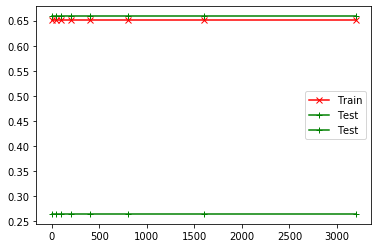

In [66]:
import matplotlib.pyplot as plt

plt.plot(df['iter'], df['train_accuracy'], 'x-', color="r",
         label="Train")
plt.plot(df['iter'], df['test_accuracy'], '+-', color="g",
         label="Test")
plt.plot(df['iter'], df['test_f1'], '+-', color="g",
         label="Test")
plt.legend()

In [49]:
df

,iter,train_accuracy,test_accuracy,test_f1,fit_time,loss
0,1,0.025000,0.066667,0.043011,0.008745,2.156945
1,50,0.133333,0.200000,0.139706,0.304607,1.025660
2,100,0.358333,0.366667,0.231546,0.507911,1.327879
3,200,0.458333,0.600000,0.604040,1.023597,1.100059
4,400,0.666667,0.666667,0.555556,2.019111,0.961140
5,800,0.333333,0.333333,0.166667,3.877440,0.958478
6,1600,0.658333,0.666667,0.534188,8.151575,0.656874
7,3200,0.741667,0.800000,0.780220,16.131205,0.469261


In [68]:
import time

import mlrose
import pandas as pd
import traitlets.utils.bunch
from mlrose import NNGSRunner
from sklearn.datasets import load_iris
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np


def process_abalone_ternary():
    df = pd.read_csv('data/abalone.data', names=["Sex", "Length", "Diameter", "Height",
                                                 "Whole weight", "Shucked weight", "Viscera weight",
                                                 "Shell weight", "Rings"])
    df = df[(df["Height"] != 1.13) & (df['Height'] != 0.515)]

    # deal with categorical data
    df.loc[df.Sex == 'M', 'Male'] = 1.
    df.loc[df.Sex == 'F', 'Female'] = 1.
    df.loc[df.Sex == 'I', 'Infant'] = 1.
    df.fillna(0, inplace=True)

    # bucketize rings
    df.loc[df.Rings < 11, 'Rings'] = 1.
    df.loc[(df.Rings < 21) & (df.Rings > 10), 'Rings'] = 2.
    df.loc[df.Rings > 20, 'Rings'] = 3.

    return traitlets.Bunch(
        data=df[['Male', 'Female', 'Infant', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
                 'Viscera weight', 'Shell weight']].values,
        target=df[['Rings']].values,
        target_names=df["Rings"].unique(),
        DESCR='abalone dataset...',
        feature_names=['Male', 'Female', 'Infant', "Length", "Diameter", "Height",
                       "Whole weight", "Shucked weight", "Viscera weight",
                       "Shell weight"],
    )



In [213]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
data = process_abalone_ternary()
# Split data into training and test sets
#data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, \
                                                    test_size = 0.2, random_state = 3)

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()



In [235]:
# Initialize neural network object and fit object
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 400, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(activation='relu', algorithm='random_hill_climb', bias=True,
              clip_max=5, curve=False, early_stopping=True, hidden_nodes=[10],
              is_classifier=True, learning_rate=0.1, max_attempts=100,
              max_iters=400, mutation_prob=0.1, pop_size=200, random_state=3,
              restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [236]:
from sklearn.metrics import accuracy_score

# Predict labels for train set and assess accuracy

y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

nn_model1=[]

0.6751497005988024
0.6694610778443114


In [218]:
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
#data = load_iris()
data = process_abalone_ternary()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, \
                                                    test_size = 0.2, random_state = 3)

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()
# Initialize neural network object and fit object
clf = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = False, clip_max = 5, max_attempts = 100
                           , schedule = mlrose.GeomDecay(init_temp=1))

clf.fit(X_train_scaled, y_train_hot)
from sklearn.metrics import accuracy_score

# Predict labels for train set and assess accuracy
y_train_pred = clf.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = clf.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)
del clf

0.6520958083832336
0.6586826347305389


In [172]:
data = process_abalone_ternary()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, \
                                                    test_size = 0.2, random_state = 3)

In [156]:
import random
random.randint(1, 1000)

209

In [237]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.read_csv('out/nn_simulated_annealing.csv')

,iter,train_accuracy,test_accuracy,test_f1,fit_time,loss
0,1,0.293413,0.293413,0.203983,0.005969,1.499112
1,50,0.388323,0.389222,0.230967,0.180834,1.236062
2,100,0.550000,0.556886,0.265318,0.375462,0.982175
3,200,0.649701,0.656287,0.264543,0.755089,0.785824
4,400,0.675150,0.669461,0.299107,1.429624,0.628498
5,800,0.710778,0.700599,0.423866,2.825678,0.571480
6,1600,0.731138,0.700599,0.428567,5.392793,0.544170
7,3200,0.756287,0.734132,0.455382,10.280171,0.506102


In [238]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.read_csv('out/nn_random_hill_climb.csv')

,iter,train_accuracy,test_accuracy,test_f1,fit_time,loss
0,1,0.293413,0.293413,0.203983,0.005990,1.499112
1,50,0.388323,0.389222,0.230967,0.179471,1.236062
2,100,0.550000,0.556886,0.265318,0.393912,0.982175
3,200,0.649701,0.656287,0.264543,0.709686,0.785824
4,400,0.675150,0.669461,0.299107,1.410153,0.628498
5,800,0.710778,0.700599,0.423866,2.755319,0.571480
6,1600,0.731138,0.700599,0.428567,5.246664,0.544170
7,3200,0.756287,0.734132,0.455382,10.122840,0.506102


In [239]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.read_csv('out/nn_genetic_alg.csv')

,iter,train_accuracy,test_accuracy,test_f1,fit_time,loss
0,1,0.293413,0.293413,0.203983,0.006274,1.499112
1,50,0.388323,0.389222,0.230967,0.200553,1.236062
2,100,0.550000,0.556886,0.265318,0.422154,0.982175
3,200,0.649701,0.656287,0.264543,0.794311,0.785824
4,400,0.675150,0.669461,0.299107,1.533444,0.628498
5,800,0.710778,0.700599,0.423866,3.222161,0.571480
6,1600,0.731138,0.700599,0.428567,5.510825,0.544170
7,3200,0.756287,0.734132,0.455382,10.461004,0.506102


In [240]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.read_csv('out/nn_gradient_descent.csv')

,iter,train_accuracy,test_accuracy,test_f1,fit_time,loss
0,1,0.293413,0.293413,0.203983,0.006065,1.499112
1,50,0.388323,0.389222,0.230967,0.184796,1.236062
2,100,0.550000,0.556886,0.265318,0.378554,0.982175
3,200,0.649701,0.656287,0.264543,0.761045,0.785824
4,400,0.675150,0.669461,0.299107,1.545120,0.628498
5,800,0.710778,0.700599,0.423866,2.868104,0.571480
6,1600,0.731138,0.700599,0.428567,5.451061,0.544170
7,3200,0.756287,0.734132,0.455382,10.898844,0.506102
